# Process all data with 3C 279 or Geminga

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve
import warnings
warnings.filterwarnings('error')

### 3C 279: load data

In [2]:
%%time 
self = main.Main('3C 279',  interval=5, mjd_range=None, 
                       weight_file='../data/3C279_weights.pkl')

Selected position: (l,b)=(305.104,57.062), radius=5
Loading data from 127 months 
	Selected 246775 photons within 5 deg of  (305.10,57.06)
	Dates: 2008-08-04 15:51 - 2018-08-01 19:25
	MJD  : 54682.7          - 58331.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/3C279_weights.pkl
	2334 / 243421 photon pixels are outside weight region
	62381 weights set to NaN
CPU times: user 1min 2s, sys: 11.6 s, total: 1min 13s
Wall time: 1min 24s


#### Create a BinnedWeights object with all data, check it

Binning: 730 intervals of 5 days from 54683.00 to 58333.00


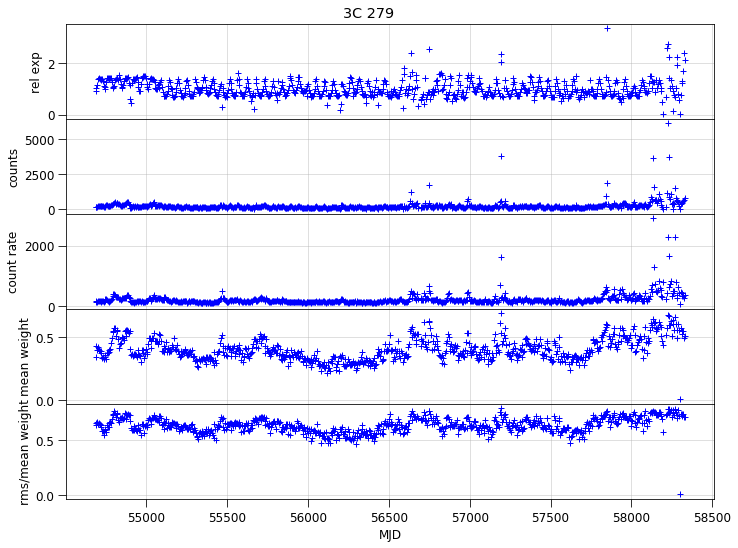

In [3]:
bw=self.binned_weights()
bw.test_plots();

#### Now pass that to the LightCurve class, which does fitting

In [4]:
lc = light_curve.LightCurve(bw); 
%time lc.fit(fix_beta=False)

Fits: 724 good, 6 failed 
CPU times: user 38.7 s, sys: 184 ms, total: 38.8 s
Wall time: 46 s


In [5]:
light_curve.data

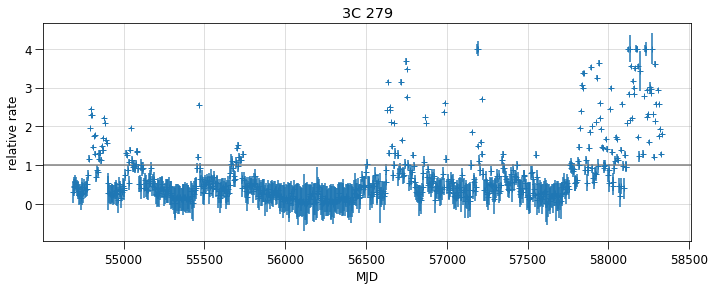

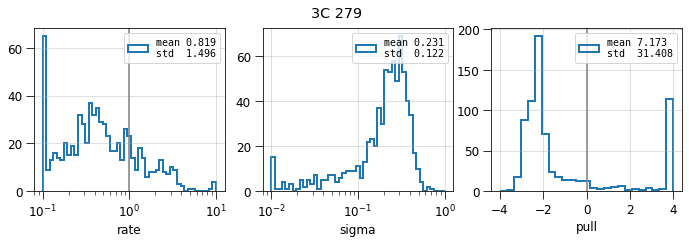

In [6]:
lc.rate_plot()
lc.fit_hists()